Cleaning Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Transaction = pd.read_csv('DMT - Transaction.csv', sep=';')
Sale = pd.read_csv('DMT - Sale.csv', sep=';')

In [ ]:
Transaction.head()

,Date / Tanggal,Customer Name / Nama Pelanggan,Product Code / Kode Barang,Description / Nama Barang
28-12-2022,PERSEROAN TERBATAS ALU AKSARA PRATAMA,8.00691.0250,5-SULFOSALICYLIC ACID DIHYDRATE FOR SYNTHESIS,3
22-12-2022,"BISI INTERNATIONAL TBK, PT",8.22343.0100,ACETAMIDE FOR SYNTHESIS,5
28-12-2022,"SARIFEED INDOJAYA, PT",1.00063.1000,ACETIC ACID GLACIAL 100% GR,75
07-12-2022,"BATARA ELOK SEMESTA TERPADU,PT",1.00063.2511,ACETIC ACID GLACIAL 100% GR - 2.5 LTR,23
14-12-2022,"GELORA DJAJA, PT",1.00063.2500,ACETIC ACID GLACIAL 100% GR - 2.5 LTR,10


In [ ]:
Transaction.columns

Index(['Date / Tanggal', 'Customer Name / Nama Pelanggan',
       'Product Code / Kode Barang', 'Description / Nama Barang'],
      dtype='object')

In [ ]:
pd.to_datetime(Transaction.reset_index(inplace=True))

In [ ]:
print(Transaction.dtypes)

index                             object
Date / Tanggal                    object
Customer Name / Nama Pelanggan    object
Product Code / Kode Barang        object
Description / Nama Barang          int64
dtype: object


In [ ]:
Transaction.head()

,index,Date / Tanggal,Customer Name / Nama Pelanggan,Product Code / Kode Barang,Description / Nama Barang
0,28-12-2022,PERSEROAN TERBATAS ALU AKSARA PRATAMA,8.00691.0250,5-SULFOSALICYLIC ACID DIHYDRATE FOR SYNTHESIS,3
1,22-12-2022,"BISI INTERNATIONAL TBK, PT",8.22343.0100,ACETAMIDE FOR SYNTHESIS,5
2,28-12-2022,"SARIFEED INDOJAYA, PT",1.00063.1000,ACETIC ACID GLACIAL 100% GR,75
3,07-12-2022,"BATARA ELOK SEMESTA TERPADU,PT",1.00063.2511,ACETIC ACID GLACIAL 100% GR - 2.5 LTR,23
4,14-12-2022,"GELORA DJAJA, PT",1.00063.2500,ACETIC ACID GLACIAL 100% GR - 2.5 LTR,10


In [ ]:
Transaction = Transaction.rename(columns={'index':'Date',
                                          'Date / Tanggal':'Customer',
                                          'Customer Name / Nama Pelanggan':'Product Code',
                                          'Product Code / Kode Barang':'Description',
                                          'Description / Nama Barang':'Quantity'
})

In [ ]:
Transaction.shape

(20, 5)

In [ ]:
Transaction.isna().sum()

,0
Date,0
Customer,0
Product Code,0
Description,0
Quantity,0


In [ ]:
Transaction = Transaction.drop_duplicates()

In [ ]:
Transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          20 non-null     object
 1   Customer      20 non-null     object
 2   Product Code  20 non-null     object
 3   Description   20 non-null     object
 4   Quantity      20 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 928.0+ bytes


In [ ]:
Transaction['Customer'] = Transaction['Customer'].str.title()
Transaction['Description'] = Transaction['Description'].str.title()

In [ ]:
Transaction.sort_values(by='Date', inplace=True, ascending=True)

In [ ]:
Transaction.reset_index(inplace=True, drop=True)

In [ ]:
Transaction

,Date,Customer,Product Code,Description,Quantity
0,03-12-2022,Bapak Ali Japtono,1.11109.0001,Am Alkalinity 0.1-10 Mmol/L 200 X - 1 Pack,2
1,07-12-2022,"Batara Elok Semesta Terpadu,Pt",1.00063.2511,Acetic Acid Glacial 100% Gr - 2.5 Ltr,23
2,08-12-2022,"Siantar Top Tbk, Pt",1.00063.2511,Acetic Acid Glacial 100% Gr - 2.5 Ltr,7
3,12-12-2022,"Muara Mas Abadi, Cv",1.11117.0001,Am Ammonium 0.5-10 Mg/L 150 X - 1 Pack,20
4,13-12-2022,"Japfa Comfeed Indonesia Tbk, Pt",1.00063.2500,Acetic Acid Glacial 100% Gr - 2.5 Ltr,1
5,14-12-2022,"Gelora Djaja, Pt",1.00063.2500,Acetic Acid Glacial 100% Gr - 2.5 Ltr,10
6,15-12-2022,"Hexa Tunggal Jaya, Pt",1.00030.4000,Acetonitrile For Chromatography - 4 Ltr,8
7,16-12-2022,Sinta Aqua Culture,1.11117.0001,Am Ammonium 0.5-10 Mg/L 150 X - 1 Pack,5
8,19-12-2022,Ir. Hardi Pitoyo,1.11117.0001,Am Ammonium 0.5-10 Mg/L 150 X - 1 Pack,5
9,20-12-2022,"Tanjung Mangaran, Cv",1.11109.0001,Am Alkalinity 0.1-10 Mmol/L 200 X - 1 Pack,5


In [ ]:
Sale.head()

,Product Code / Kode Barang,Harga Jual
0,8.00691.0250,2300000
1,8.22343.0100,140000
2,1.00063.1000,245700
3,1.00063.2511,3450000
4,1.00063.2500,109000


In [ ]:
Sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Product Code / Kode Barang  8 non-null      object
 1   Harga Jual                  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [ ]:
Sale = Sale.rename(columns={'Product Code / Kode Barang':'Product Code',
                            'Harga Jual':'Price'})

In [ ]:
df = pd.merge(Transaction, Sale, on='Product Code')

In [ ]:
df['Total Price'] = df['Quantity'] * df['Price']

In [ ]:
df

,Date,Customer,Product Code,Description,Quantity,Price,Total Price
0,03-12-2022,Bapak Ali Japtono,1.11109.0001,Am Alkalinity 0.1-10 Mmol/L 200 X - 1 Pack,2,1239000,2478000
1,07-12-2022,"Batara Elok Semesta Terpadu,Pt",1.00063.2511,Acetic Acid Glacial 100% Gr - 2.5 Ltr,23,3450000,79350000
2,08-12-2022,"Siantar Top Tbk, Pt",1.00063.2511,Acetic Acid Glacial 100% Gr - 2.5 Ltr,7,3450000,24150000
3,12-12-2022,"Muara Mas Abadi, Cv",1.11117.0001,Am Ammonium 0.5-10 Mg/L 150 X - 1 Pack,20,2370000,47400000
4,13-12-2022,"Japfa Comfeed Indonesia Tbk, Pt",1.00063.2500,Acetic Acid Glacial 100% Gr - 2.5 Ltr,1,109000,109000
5,14-12-2022,"Gelora Djaja, Pt",1.00063.2500,Acetic Acid Glacial 100% Gr - 2.5 Ltr,10,109000,1090000
6,15-12-2022,"Hexa Tunggal Jaya, Pt",1.00030.4000,Acetonitrile For Chromatography - 4 Ltr,8,239000,1912000
7,16-12-2022,Sinta Aqua Culture,1.11117.0001,Am Ammonium 0.5-10 Mg/L 150 X - 1 Pack,5,2370000,11850000
8,19-12-2022,Ir. Hardi Pitoyo,1.11117.0001,Am Ammonium 0.5-10 Mg/L 150 X - 1 Pack,5,2370000,11850000
9,20-12-2022,"Tanjung Mangaran, Cv",1.11109.0001,Am Alkalinity 0.1-10 Mmol/L 200 X - 1 Pack,5,1239000,6195000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          20 non-null     object
 1   Customer      20 non-null     object
 2   Product Code  20 non-null     object
 3   Description   20 non-null     object
 4   Quantity      20 non-null     int64 
 5   Price         20 non-null     int64 
 6   Total Price   20 non-null     int64 
dtypes: int64(3), object(4)
memory usage: 1.2+ KB


EDA

In [ ]:
numeric = df.select_dtypes(include=np.number).columns
numeric

Index(['Quantity', 'Price', 'Total Price'], dtype='object')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


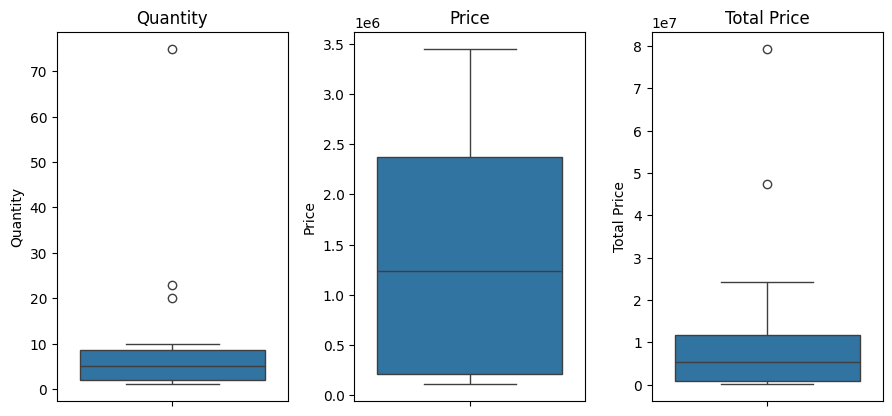

In [ ]:
plt.figure(figsize = (12,12))
for i in range(len(numeric)):
    plt.subplot(3,4,i+1)
    sns.boxplot(df[numeric[i]], orient = "v")
    plt.title(numeric[i])
    plt.tight_layout()

In [59]:
daily_order = pd.pivot_table(
    data=df,
    index="Date",
    values=["Quantity","Total Price"],
    aggfunc={"Quantity":"sum","Total Price":"sum"}
).reset_index()

daily_order

,Date,Quantity,Total Price
0,03-12-2022,2,2478000
1,07-12-2022,23,79350000
2,08-12-2022,7,24150000
3,12-12-2022,20,47400000
4,13-12-2022,1,109000
5,14-12-2022,10,1090000
6,15-12-2022,8,1912000
7,16-12-2022,5,11850000
8,19-12-2022,5,11850000
9,20-12-2022,5,6195000


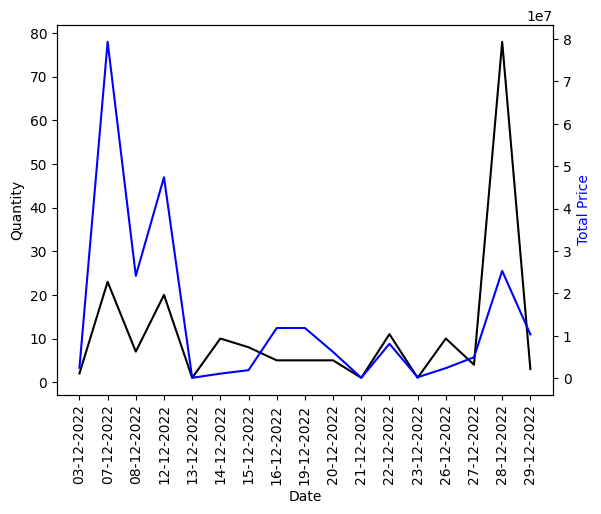

In [60]:
fig,ax = plt.subplots()
ax.plot(daily_order["Date"], daily_order["Quantity"], color="black")
ax.set_xlabel("Date", fontsize = 10)
plt.xticks(rotation=90)
ax.set_ylabel("Quantity", color="black", fontsize=10)

#different y-axis
ax2=ax.twinx()
ax2.plot(daily_order["Date"], daily_order["Total Price"], color="blue")
ax2.set_ylabel("Total Price", color="blue", fontsize=10)
plt.show()

Visualization

In [82]:
customer_order = pd.pivot_table(
    data=df,
    index="Customer",
    values=["Product Code","Quantity","Total Price"],
    aggfunc={"Product Code":"count", "Quantity":"sum","Total Price":"sum"}
).reset_index().rename(columns={"Product Code":"Total Order"})

customer_order

,Customer,Total Order,Quantity,Total Price
0,Bapak Ali Japtono,1,2,2478000
1,"Batara Elok Semesta Terpadu,Pt",1,23,79350000
2,"Bisi International Tbk, Pt",1,5,700000
3,"Essentra, Pt",1,10,2390000
4,"Gelora Djaja, Pt",1,10,1090000
5,"Hexa Tunggal Jaya, Pt",1,8,1912000
6,"Indofood Cbp Sukses Makmur Tbk, Pt",1,3,10350000
7,Ir. Hardi Pitoyo,1,5,11850000
8,"Japfa Comfeed Indonesia Tbk, Pt",1,1,109000
9,"Maxxi Agri Indonesia, Pt",2,2,348000


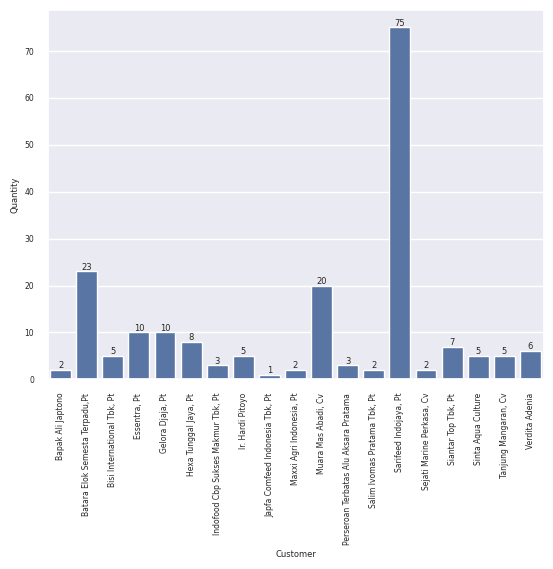

In [89]:
vis_customer1 = sns.barplot(data=customer_order, x="Customer",  y="Quantity")
plt.xticks(rotation=90)
for i in vis_customer1.containers:
    vis_customer1.bar_label(i,)

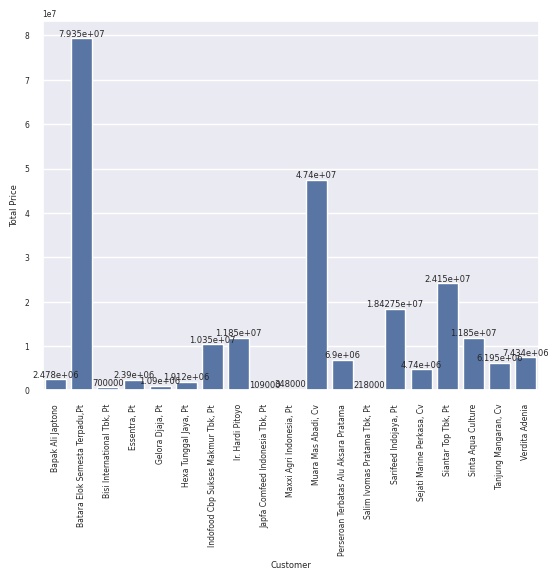

In [90]:
vis_customer2 = sns.barplot(data=customer_order, x="Customer",  y="Total Price")
plt.xticks(rotation=90)
for i in vis_customer2.containers:
    vis_customer2.bar_label(i,)

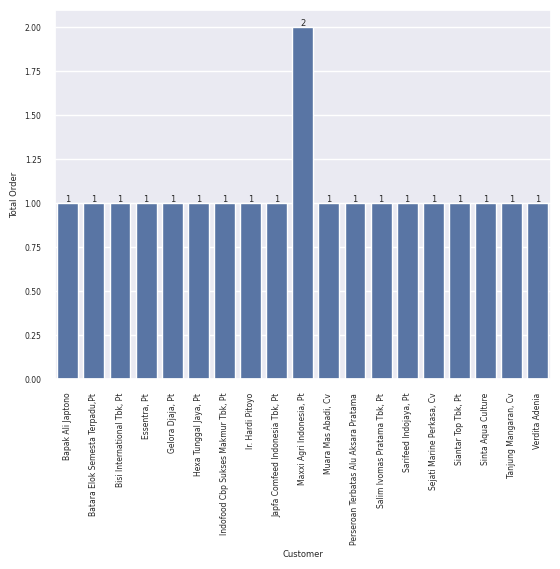

In [91]:
vis_customer3 = sns.barplot(data=customer_order, x="Customer",  y="Total Order")
plt.xticks(rotation=90)
for i in vis_customer3.containers:
    vis_customer3.bar_label(i,)

In [81]:
df.groupby(["Customer"], as_index=False)["Total Price"].count()

,Customer,Total Price
0,Bapak Ali Japtono,1
1,"Batara Elok Semesta Terpadu,Pt",1
2,"Bisi International Tbk, Pt",1
3,"Essentra, Pt",1
4,"Gelora Djaja, Pt",1
5,"Hexa Tunggal Jaya, Pt",1
6,"Indofood Cbp Sukses Makmur Tbk, Pt",1
7,Ir. Hardi Pitoyo,1
8,"Japfa Comfeed Indonesia Tbk, Pt",1
9,"Maxxi Agri Indonesia, Pt",2


In [68]:
product_code_order = pd.pivot_table(
    data=df,
    index="Product Code",
    values=["Quantity","Total Price"],
    aggfunc="sum"
).sort_values(by="Total Price", ascending=False).reset_index()

product_code_order

,Product Code,Quantity,Total Price
0,1.00063.2511,33,113850000
1,1.11117.0001,32,75840000
2,1.00063.1000,75,18427500
3,1.11109.0001,13,16107000
4,8.00691.0250,3,6900000
5,1.00030.4000,19,4541000
6,1.00063.2500,14,1526000
7,8.22343.0100,5,700000


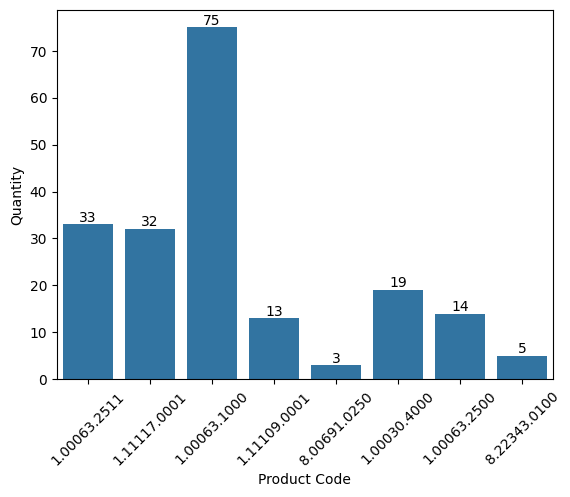

In [70]:
vis_prod_code_quant = sns.barplot(data=product_code_order, x="Product Code",  y="Quantity")
plt.xticks(rotation=45)
for i in vis_prod_code_quant.containers:
    vis_prod_code_quant.bar_label(i,)

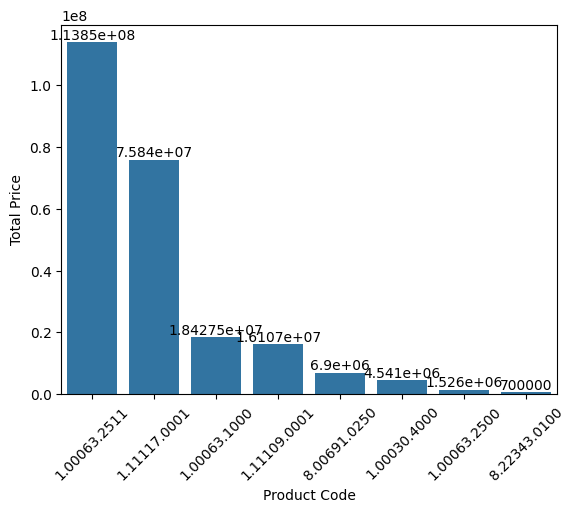

In [71]:
vis_prod_code_price = sns.barplot(data=product_code_order, x="Product Code",  y="Total Price")
plt.xticks(rotation=45)
for i in vis_prod_code_price.containers:
    vis_prod_code_price.bar_label(i,)

In [72]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,20.0,9.7,1.647039e+01,1.0,2.0,5.0,8.5,75.0
Price,20.0,1369285.0,1.274662e+06,109000.0,214250.0,1239000.0,2370000.0,3450000.0
Total Price,20.0,11894575.0,1.947382e+07,109000.0,992500.0,5467500.0,11850000.0,79350000.0


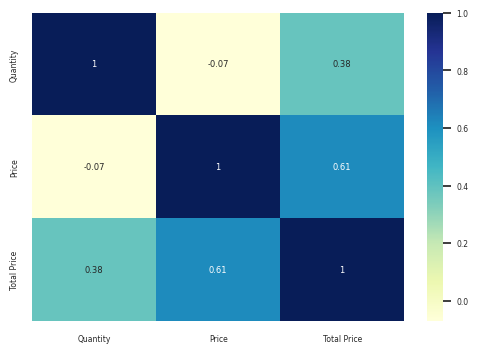

In [76]:
#heatmap for numeric columns
numeric2 = df.select_dtypes(include=np.number).columns
numeric2

plt.figure(figsize = (6,4))
sns.heatmap(df[numeric2].corr(), cmap="YlGnBu", annot=True)
sns.set(font_scale=0.5)